In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
data.shape

(32560, 15)

In [5]:
data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [6]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [7]:
data.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [8]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

In [9]:
for i in data.columns:
    if data[i].dtypes == 'object':
        data[i] = ord_enc.fit_transform(data[i].values.reshape(-1,1))
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0.0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,0,0,38,39.0,0.0
32556,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,0,0,40,39.0,1.0
32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,0,0,40,39.0,0.0
32558,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,0,0,20,39.0,0.0


In [10]:
data.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [11]:
# Finding the correlation 

data.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

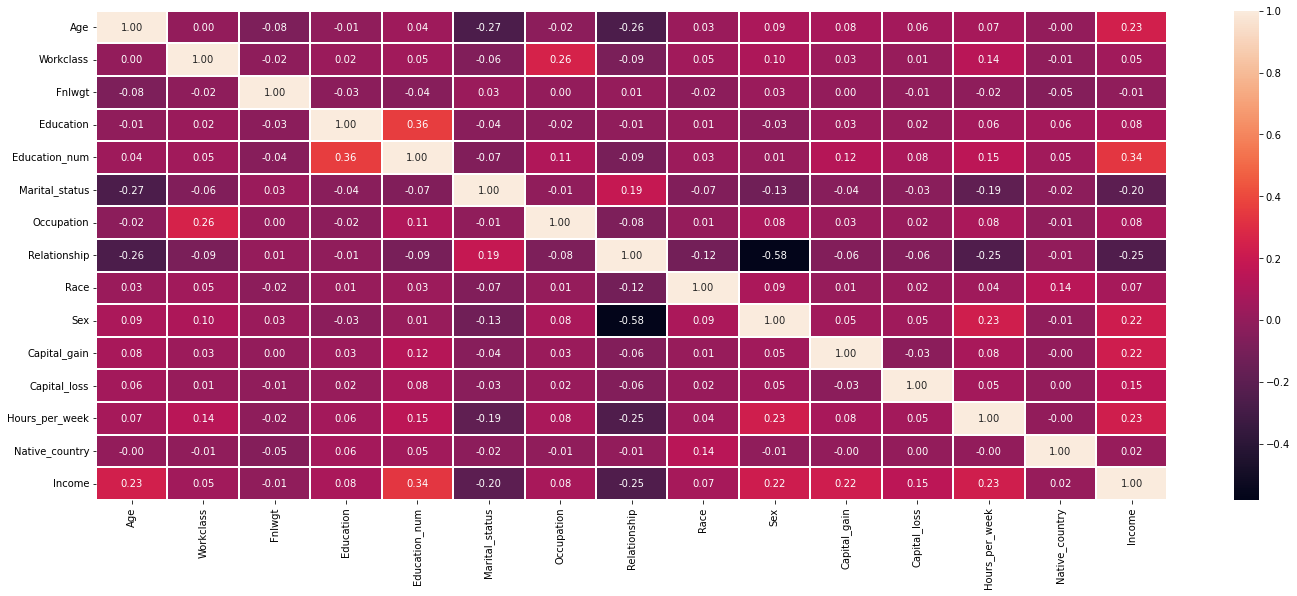

In [13]:
plt.figure(figsize=(24,9))
sns.heatmap(data.corr(),annot=True,linewidth=0.1, fmt ="0.2f")  

In [14]:
data.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

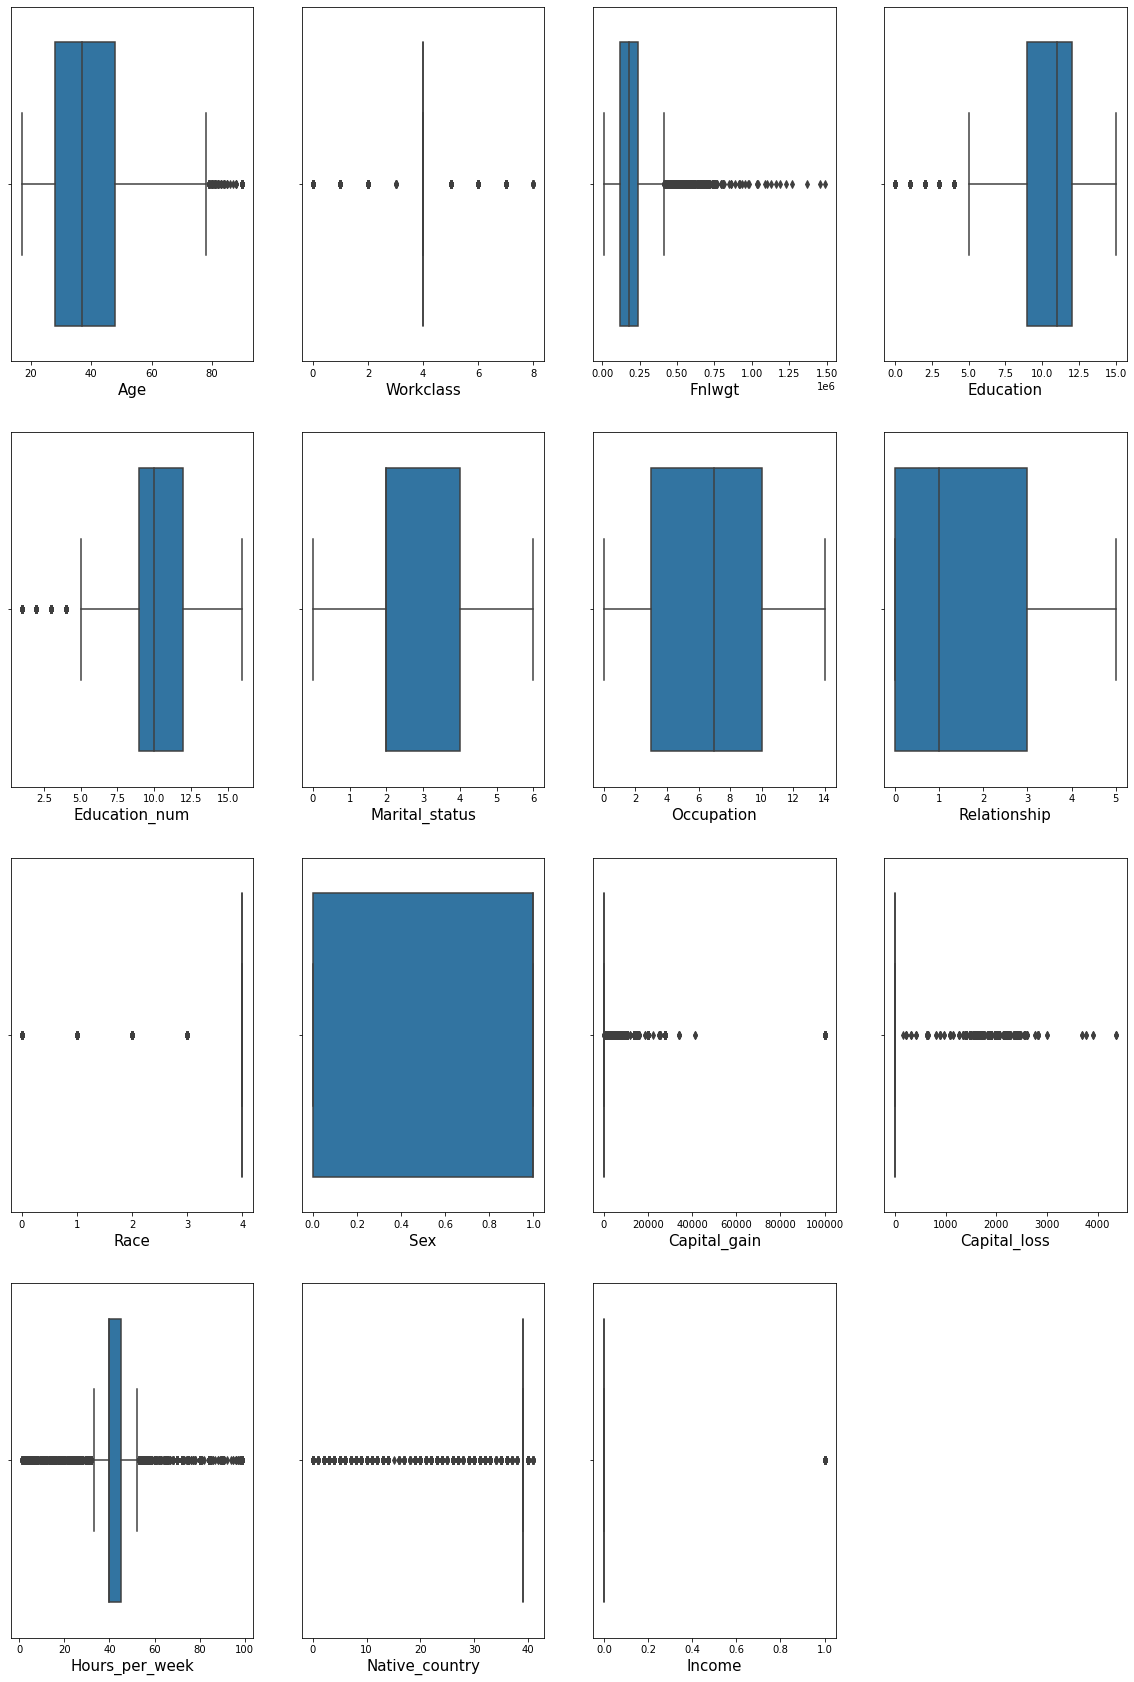

In [15]:
plt.figure(figsize=(20,30))
graph = 1

for column in data:
    if graph<=16:
        plt.subplot(4,4,graph)
        ax=sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [16]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3-q1

In [17]:
fnl_high = (q3.Fnlwgt + (1.5*iqr.Fnlwgt ))
fnl_high
index = np.where(data['Fnlwgt']>fnl_high)
data = data.drop(data.index[index])
data.shape
data.reset_index()

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
1,1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
2,2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
3,3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0.0
4,4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31563,32555,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,0,0,38,39.0,0.0
31564,32556,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,0,0,40,39.0,1.0
31565,32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,0,0,40,39.0,0.0
31566,32558,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,0,0,20,39.0,0.0


In [18]:
c_gain_high = (q3.Capital_gain + (1.5*iqr.Capital_gain ))
c_gain_high
index = np.where(data['Capital_gain']>c_gain_high)
data = data.drop(data.index[index])
data.shape
data.reset_index()

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
1,1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
2,2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
3,3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0.0
4,4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28927,32554,22,4.0,310152,15.0,10,4.0,11.0,1.0,4.0,1.0,0,0,40,39.0,0.0
28928,32555,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,0,0,38,39.0,0.0
28929,32556,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,0,0,40,39.0,1.0
28930,32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,0,0,40,39.0,0.0


In [19]:
c_loss_high = (q3.Capital_loss + (1.5*iqr.Capital_loss ))
c_loss_high
index = np.where(data['Capital_loss']>c_loss_high)
data = data.drop(data.index[index])
data.shape
data.reset_index()

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
1,1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
2,2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
3,3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0.0
4,4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27438,32554,22,4.0,310152,15.0,10,4.0,11.0,1.0,4.0,1.0,0,0,40,39.0,0.0
27439,32555,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,0,0,38,39.0,0.0
27440,32556,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,0,0,40,39.0,1.0
27441,32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,0,0,40,39.0,0.0


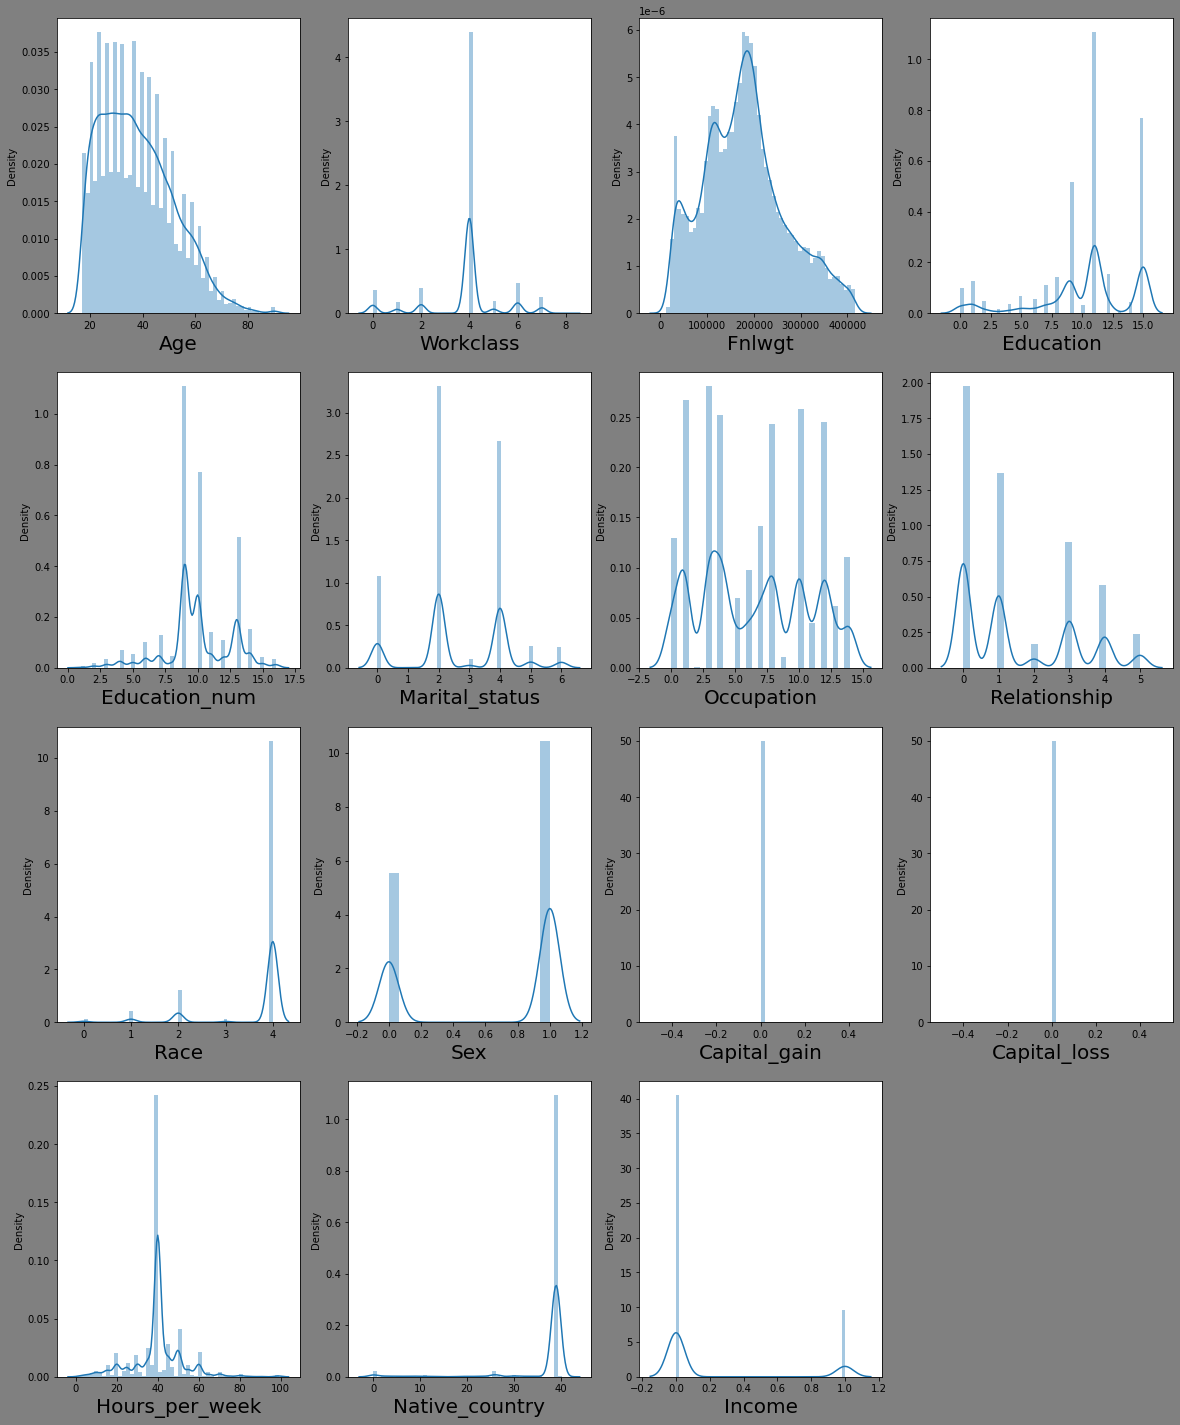

In [21]:
plt.figure(figsize=(20,25),facecolor='grey')
plotnumber = 1
for column in data:
    if plotnumber <16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [22]:
data.shape

(27443, 15)

In [23]:
data.skew()

Age               0.589146
Workclass        -0.763330
Fnlwgt            0.405977
Education        -0.927164
Education_num    -0.324953
Marital_status   -0.082012
Occupation        0.122238
Relationship      0.705729
Race             -2.411795
Sex              -0.641811
Capital_gain      0.000000
Capital_loss      0.000000
Hours_per_week    0.234758
Native_country   -3.676416
Income            1.572133
dtype: float64

In [26]:
# Percentage loss of data
data_loss=((32560-27443)/32560)*100
data_loss

15.715601965601966

In [27]:
x = data.drop('Income',axis =1)
y = data['Income']

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 8.81703489e-01,  1.47098063e+00, -1.10155278e+00, ...,
         0.00000000e+00, -2.18993606e+00,  2.90510857e-01],
       [-1.28532889e-04,  9.76350007e-02,  4.09993292e-01, ...,
         0.00000000e+00, -1.54170308e-03,  2.90510857e-01],
       [ 1.10216149e+00,  9.76350007e-02,  6.27870205e-01, ...,
         0.00000000e+00, -1.54170308e-03,  2.90510857e-01],
       ...,
       [ 1.46843471e-01,  9.76350007e-02, -2.89862762e-01, ...,
         0.00000000e+00, -1.54170308e-03,  2.90510857e-01],
       [ 1.46959150e+00,  9.76350007e-02, -3.18006863e-01, ...,
         0.00000000e+00, -1.54170308e-03,  2.90510857e-01],
       [-1.17590456e+00,  9.76350007e-02,  2.48301780e-01, ...,
         0.00000000e+00, -1.62257456e+00,  2.90510857e-01]])

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.metrics import accuracy_score

In [30]:
for i in range (0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train= lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state", i)
        print("Training accuracy score is:", round(accuracy_score(y_train,pred_train)*100,1))
        print("Testing accuracy score is:", round(accuracy_score(y_test,pred_test)*100,1), '\n\n')

At random state 5
Training accuracy score is: 82.8
Testing accuracy score is: 82.8 


At random state 10
Training accuracy score is: 82.8
Testing accuracy score is: 82.8 


At random state 32
Training accuracy score is: 82.8
Testing accuracy score is: 82.8 


At random state 38
Training accuracy score is: 82.7
Testing accuracy score is: 82.7 


At random state 62
Training accuracy score is: 82.8
Testing accuracy score is: 82.8 


At random state 64
Training accuracy score is: 82.8
Testing accuracy score is: 82.8 


At random state 145
Training accuracy score is: 82.8
Testing accuracy score is: 82.8 


At random state 150
Training accuracy score is: 82.8
Testing accuracy score is: 82.8 


At random state 164
Training accuracy score is: 82.8
Testing accuracy score is: 82.8 


At random state 179
Training accuracy score is: 82.7
Testing accuracy score is: 82.7 


At random state 185
Training accuracy score is: 82.8
Testing accuracy score is: 82.8 


At random state 246
Training accuracy s

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.20,random_state=513)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

         0.0       0.81      0.91      0.85      4426
         1.0       0.18      0.09      0.12      1063

    accuracy                           0.75      5489
   macro avg       0.49      0.50      0.49      5489
weighted avg       0.68      0.75      0.71      5489



In [33]:
pred_lr = lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test,pred_lr)

In [34]:
for j in range(2,10):
    lsscore = cross_val_score(lr, x,y, cv = j)
    lsc = lsscore.mean()
    print("At cv:", j)
    print("Cross validation score is :", lsc*100)
    print("Accuracy score is :", lss*100)
    print("\n")

At cv: 2
Cross validation score is : 82.70232618238191
Accuracy score is : 82.83840408088905


At cv: 3
Cross validation score is : 82.7934271256883
Accuracy score is : 82.83840408088905


At cv: 4
Cross validation score is : 82.79343028984971
Accuracy score is : 82.83840408088905


At cv: 5
Cross validation score is : 82.78249116839562
Accuracy score is : 82.83840408088905


At cv: 6
Cross validation score is : 82.77155798055882
Accuracy score is : 82.83840408088905


At cv: 7
Cross validation score is : 82.78613587745734
Accuracy score is : 82.83840408088905


At cv: 8
Cross validation score is : 82.78614616517382
Accuracy score is : 82.83840408088905


At cv: 9
Cross validation score is : 82.79343282547774
Accuracy score is : 82.83840408088905




In [35]:
lsscore_selected = cross_val_score(lr, x,y, cv = 9).mean()
print(" The CV score is :",lsscore_selected)
print (" The accuracy_score is :",lss)

 The CV score is : 0.8279343282547773
 The accuracy_score is : 0.8283840408088905
